*First compiled on May 25, 2017.*

In [4]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(60)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+14.gdc3fb50.dirty on 2017-09-15 14:17.


# Comparison with DPT

This notebook reads results written in [*nestorowa16*](nestorowa16.ipynb).

DPT has been introduced by [Haghverdi *et al.* (2016)](https://doi.org/10.1038/nmeth.3971) and extended to treat multiple branchings (hierarchical DPT) by [Wolf *et al.* (2017)](https://doi.org/10.1101/174029). While hierarchical DPT detects 5 of the 10 experimental groups, the generated partions ("dpt_groups") contain wide, biologically and geometrically disconnected, parts of the data. Hierarchical DPT works well for [simple cases](../minimal_examples/comparisons/dpt.ipynb).

Also, note that already after the first branching, an "invalid state is reached" meaning that very far away B cells, Erytrhocytes and megakaryoctytes appear in the same branch. Only at `n_branchings=2`, the detected groups are meaningful. At `n_branchings=3`, the meaningless partitions 6, 7 and 8 are generated.

reading file ./write/nestorowa16.h5
n_branchings: 1
perform Diffusion Pseudotime analysis
    using "X_pca" for building graph
    using stored data graph with n_neighbors = 4 and spectrum
    [ 1.            0.9911447763  0.9895198941  0.9886388779  0.983188808
      0.9765303135  0.9730944037  0.9681537747  0.9666156173  0.962413609 ]
    detect 1 branching
    do not consider groups with less than 16 points for splitting
    branching 1: split group 0
finished (0:00:00.504) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


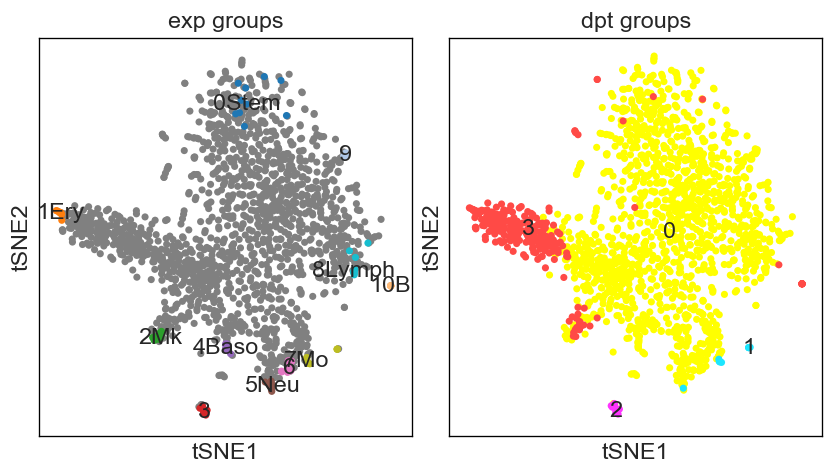

n_branchings: 2
perform Diffusion Pseudotime analysis
    using "X_pca" for building graph
    using stored data graph with n_neighbors = 4 and spectrum
    [ 1.            0.9911447763  0.9895198941  0.9886388779  0.983188808
      0.9765303135  0.9730944037  0.9681537747  0.9666156173  0.962413609 ]
    this uses a hierarchical implementation
    detect 2 branchings
    do not consider groups with less than 16 points for splitting
    branching 1: split group 0
    branching 2: split group 3
finished (0:00:00.504) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)
    number of defined colors does not match number of categories, using palette


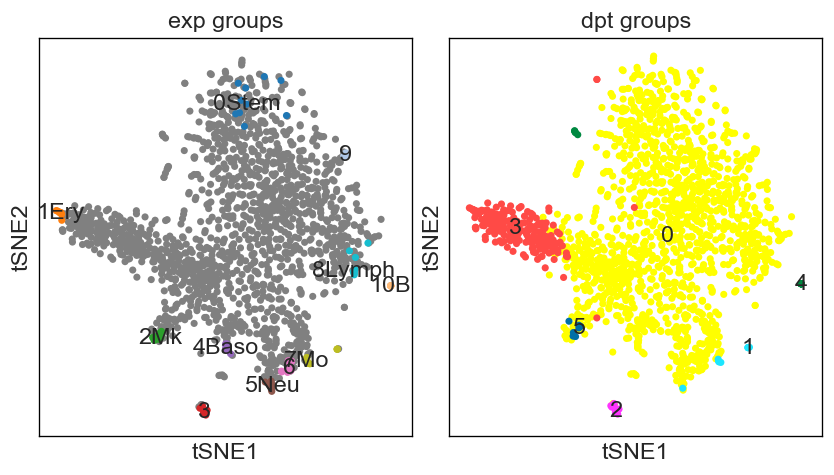

n_branchings: 3
perform Diffusion Pseudotime analysis
    using "X_pca" for building graph
    using stored data graph with n_neighbors = 4 and spectrum
    [ 1.            0.9911447763  0.9895198941  0.9886388779  0.983188808
      0.9765303135  0.9730944037  0.9681537747  0.9666156173  0.962413609 ]
    this uses a hierarchical implementation
    detect 3 branchings
    do not consider groups with less than 16 points for splitting
    branching 1: split group 0
    branching 2: split group 3
    branching 3: split group 0
finished (0:00:00.849) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)
    number of defined colors does not match number of categories, using palette


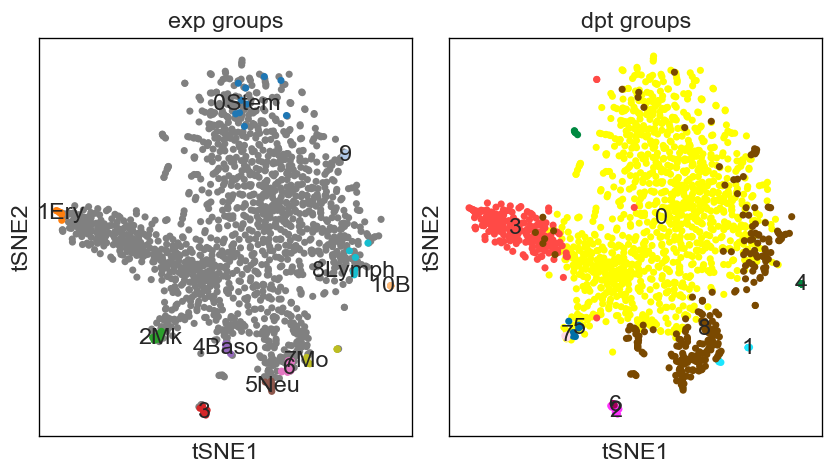

In [5]:
adata = sc.read('nestorowa16')
for n_branchings in [1, 2, 3]:
    print('n_branchings:', n_branchings)
    sc.tl.dpt(adata, n_branchings=n_branchings, n_neighbors=4, allow_kendall_tau_shift=False)
    ax = sc.pl.tsne(adata, color=['exp_groups', 'dpt_groups'], palette=[sc.pl.palettes.vega_20, sc.pl.palettes.godsnot_64],
                    legend_loc='on data', legend_fontsize=14)